<font color="blue" size=5><b> Story About Dataset</b></font>

<p>
McNeil(Plaintiff) injured in a Snowboard Accident.He contended that Snowboard he was using i.e Carve 3000 X5 was       defective.Few Mock Jurors are assigned with task to find if the Carve 3000 snowboard X5 was really defective or       not(i.e Liability) and assign damage percentages.</p>
<p>Plaintiff Argument:The holes that resist corosion are missing from the snowboard,which cause the accident.He is      asking for 500,000 dollars to compensate his pain and sufferings.He asked for 490,000 dollars non-Economic damages for his   pain and suffering and 10,000 dollars for economical damages.</p>
<p>Defedent Argument: Damages is high.</p>

- There are 8 different paths.
1. 1-4 path with no low Anchor
2. 5-8 path with Low Anchor
<p>Limiting Jury instructions presented at 3,7,paths and Limiting Jury instruction with explanation introduced in
4,8 paths</p>


Before a jury begins deliberatins, Judge will give instructions about the evidence of the case.For the fair trial,the court must sometimes limit the jurys considerations of a fact or evidence.This is done through a limiting instruction.
Specifically,it tells the jury to disregard evidence completely or just for a specific purpose.
  

Mock Jurors were asked to watch videos where each video is of around 20-30 mins.They were asked 41 different questions(attributes of our dataset) which includes the information about Juror(like Age,sex,Education,Income etc) and questions like Was McNeil negligent?,If you find that Mc.Neil was fault,assign damage percentage, etc.Q40 and Q41 includes if there is any change in the decision if Limiting Jury instruction introduced.

There were two variations of the Plaintiff's closing argument.In both variations,Plaintiff made the same liability argument followed by one of the two damage demands.Plaintiff's attorney asked the Jury to award either 250,000 dollars or 5 million dollars to compensate for pain and suffering associated with the back injury,We viewed that 250,000 dollars as an objectively reasonable figure because it is roughly the average award given by mock jurors earlier.

Mock Jurors were then asked to render a decision on both liability and damages.These individual jurors results were then combined with 11 other randomly selected jurors decision to create a mock jury descision.



<font color="blue" size=5><b> Objectives: </b></font>

- Path 1-4 vs Path 5-8 Regression Analysis
- Regression Analysis for the Stair case and Snowboard Scenarios
- Linear model on Discounted Damages and the Path
- Damages calculations for each Path of new dataset
- Regression Analysis of Liability vs Path, Education and Income
- Plots for the data
- Regression Analysis for Q40 and Q41
- Damage calculations for the merged dataset



<font color="blue" size=5><b> New Dataset(Snowboard) after cleaning and extracting required columns</b></font>
-  After Cleaning and filtering the data,we are left with 729 participants out of 804 participants. 
- We have cleaned the data(cleaning.ipynb) and loaded cleaned data to cleaning.csv table)

In [495]:
import pandas as pd
data18 = pd.read_csv('cleaning.csv', encoding= 'ISO-8859-1')
data14 = pd.read_csv('cleaning.csv', encoding= 'ISO-8859-1')

In [ ]:
run matplotlin inline

For rest of the calculations, we will consider total 4 paths.so replacing path 5-8 with 1-4 respectively for data14.

In [496]:
data14['Path'].replace([5,6,7,8], [1,2,3,4], inplace = True)

In [497]:
data14.dtypes

Unnamed: 0                                             int64
StartDate                                             object
EndDate                                               object
Duration                                               int64
Was_snowboard_sold_McNeil_defective_14               float64
Is_substantial_factor_McNeil_injuries_14             float64
Non_economic_damages_McNeil_suffered_14              float64
Was_McNeil_negligent                                 float64
McNeil_negligence_substantial_factor_for_injuries    float64
Percentage_of_responsibility_X5                      float64
Percentage_of_responsibility_McNeil                  float64
Was_snowboard_sold_McNeil_defective_58               float64
Is_substantial_factor_McNeil_injuries_58             float64
Economic_damages_McNeil_suffer_58                    float64
Non_economic_damages_McNeil_suffered_58              float64
Q40                                                  float64
Q41                     

In [498]:
data14.shape

(729, 24)

<font color="blue" size=5><b> 1: Plot Of Total Damages(Discounted) vs Path. </b></font>

**Note: We used Violin Plot because it allows a deeper understanding of the density of distribution.** 

### 1)  Plot including 0's for Total Damages(Discounted Damages) 

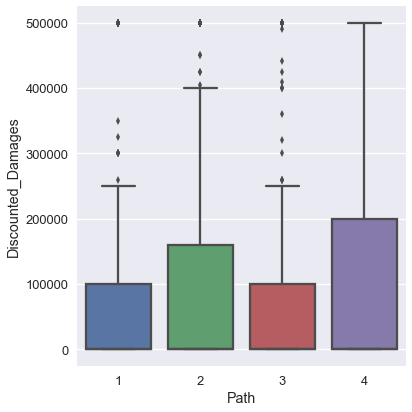

In [499]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.factorplot(x='Path', y='Discounted_Damages', kind='box',data=data14, size=6)

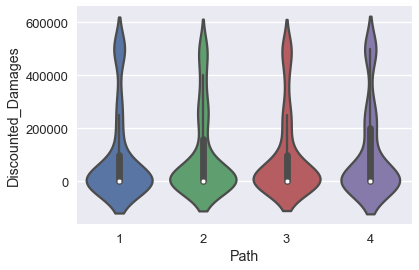

In [500]:
_ = sns.violinplot(x="Path", y="Discounted_Damages", data=data14, inner = 'box', size=6)

### 2) Box plot excluding 0s for Total Damages (Discounted Damages)

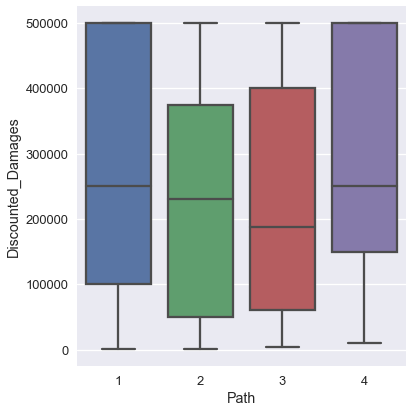

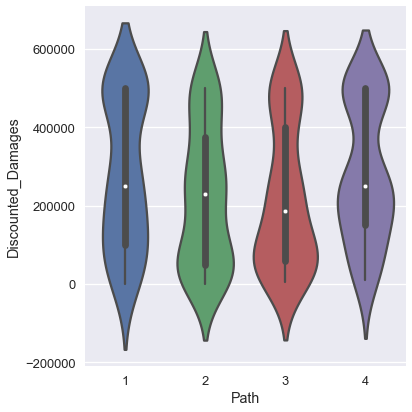

In [501]:
_ = sns.factorplot(x='Path', y='Discounted_Damages', kind='box',data=data14[data14.Discounted_Damages >0], size=6)
_ = sns.factorplot(x='Path', y='Discounted_Damages', kind='violin',data=data14[data14.Discounted_Damages >0], size=6)

<font color="blue" size=5><b> 2: Plot of Liability vs Paths </b></font>

Liability,No,Yes,Total
Path,,,
1 & 5,103,73,176
2 & 6,96,92,188
3 & 7,95,95,190
4 & 8,96,79,175
Total,390,339,729


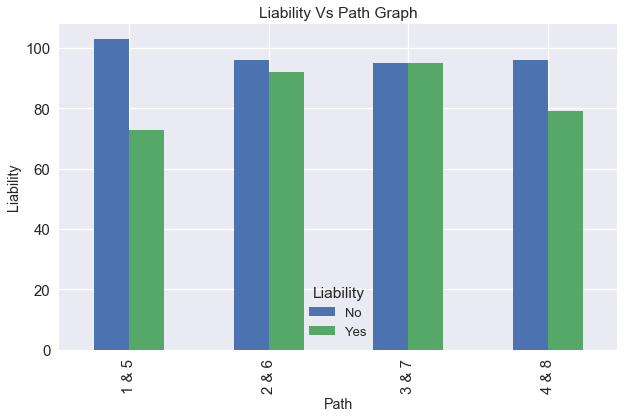

In [502]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


a = data14['Path']
a = a.astype(str)
a.replace(['1','2','3','4'],['1 & 5','2 & 6','3 & 7','4 & 8'],inplace = True)
b = data14['Liability']


pd.crosstab(a,b).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Path Graph')
plt.xlabel('Path')
plt.ylabel('Liability')
plt.savefig('Juror Response vs Path')

pd.crosstab(a,b,margins=True, margins_name='Total')

<font color="blue" size=5><b> Finding the Winrate, Expected Damages, mean , median and SD for Discounted Damages</b></font>

Here we are calculating the damages mean, median sd and winrate percentage when the plaintiff wins for path 1-4. 

In [503]:
## Finding winrate percentage for each path 
import numpy as np

ratedf=pd.DataFrame(data14[['Liability','Path','Was_McNeil_negligent']])
ratedf['winrate_percentage']=ratedf.Liability
ratedf['Discounted_damages_mean']=pd.to_numeric(data14.Discounted_Damages)  
ratedf['Discounted_damages_median']=pd.to_numeric(data14.Discounted_Damages)  
ratedf['Discounted_damages_sd']=pd.to_numeric(data14.Discounted_Damages) 
ratedf['winrate_percentage'] = ratedf['winrate_percentage'].map({"Yes":1, "No":0})
ratedf['No.of.Participants']=ratedf['Path']


winrate_damages_expected=ratedf.groupby('Path').aggregate(
    {'No.of.Participants':'count','winrate_percentage': np.mean
     
     ,'Discounted_damages_mean': np.mean
     ,'Discounted_damages_median':np.median
     ,'Discounted_damages_sd':np.std
     
    })
winrate_damages_expected['winrate_percentage']=winrate_damages_expected['winrate_percentage']*100.0
winrate_damages_expected

,No.of.Participants,winrate_percentage,Discounted_damages_mean,Discounted_damages_median,Discounted_damages_sd
Path,,,,,
1,176,41.477273,91850.795455,0.0,169591.046335
2,188,48.936170,98567.021277,0.0,160381.672369
3,190,50.000000,94718.421053,0.0,159153.185426
4,175,45.142857,108744.285714,0.0,173752.741139


<font color="blue" size=5><b> Finding the Damages, mean , median and SD when plaintiff wins.</b></font>

In [504]:
winrate_damages_plaintiffwin = ratedf.loc[(ratedf['Was_McNeil_negligent']== 1) & (ratedf['Liability']=='Yes')].groupby('Path').aggregate(
    {'No.of.Participants':'count',
        'Discounted_damages_mean': np.mean
     ,'Discounted_damages_median':np.median
     ,'Discounted_damages_sd':np.std
    })
winrate_damages_plaintiffwin

,No.of.Participants,Discounted_damages_mean,Discounted_damages_median,Discounted_damages_sd
Path,,,,
1,30,207724.666667,187500.0,152546.260744
2,47,158300.000000,80000.0,156560.967427
3,47,120329.787234,85000.0,115213.802983
4,30,181691.666667,200000.0,123272.540838


# Question 1 :
------------------------------------------------------------
 

<font color = red>
With respect to the first question, I realize that answers from participants in versions 1 and 5 are meaningless.  They did not see evidence of added core inserts. As far as the analysis, I think we want to see if this answer predicted how people responded to the liability questions. For example, did people that said "Yes this evidence strongly suggested the Carve 3000 was defective” find liability more often than people that answered “No”. 
</font>

Here Q40 is **"Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?"**

The Values are: 
- 1 = Yes, it strongly suggested that the original Carve 3000 was defective.
- 2 = Yes, it somewhat suggested that the original Carve 3000 was defective.
- 3 = No, it did not suggest that the original Carve 3000 was defective.

So first lets check the brief summary table for each scenario.

In [ ]:
newdf_2_8 = data18[~data18['Path'].isin([1,5])]
newdf_2_8['Q40'] = newdf_2_8['Q40'].astype(str)
a = newdf_2_8['Q40'].replace(['1.0','2.0','3.0'], ['Yes','Maybe','No'])
a = a[a.apply(len) > 0]
b = newdf_2_8['Liability']

p = pd.crosstab([b,a], newdf_2_8.Path,  margins=True , margins_name='Total')
p

## Observation 

#### Below is the plot for Path 2,3,4,6,7,8

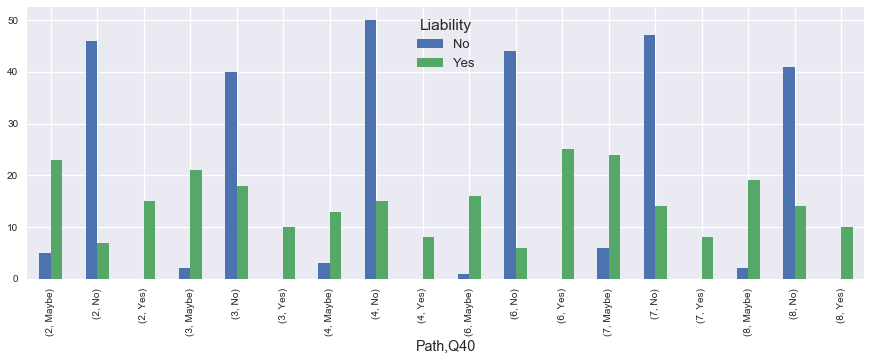

In [506]:
_ = pd.crosstab([newdf_2_8.Path,a], b).plot(kind='bar', fontsize = 10, figsize=(15,5))

## Observation Based on the graph:

1) When a juror has strongly suggested that the original Carve 3000 was defective, all of them responded to the liability question as **"Yes"**.

2) When a juror is somewhat suggested that the original Carve 3000 was defective, they are more likely to respond the liability question as **"Yes"**.

3) When a juror is saying "No" to Q40 and saying that it does not suggest that the original Carve 3000 was defective, they are more likely to respond the liability question as **"No."**


.

<font color = red>Professor Bernard's comment:</font>

One more **comment in the 1st question**.  We also want to see if the jury instructions in 3,4 and 7,8 help participant resist the evidence.  
So we want to also compare if verdicts as a function of yes, no, maybe in <font color = red>2 and 5 are </font>different than those in 3,4,7 & 8.  If they do, we want to see if the different instructions matter.  That is verdicts as function of yes, no, maybe or different in 3 and 7 vs 4 and 8.


<font color="blue" size=4><b> 1. Regression of Q40 vs Liability (Model 1)</b></font>
-------------------------------

**Effect of juror response for Q40 (Yes, No, Maybe) on Liability.**

In [ ]:
import statsmodels.formula.api as smf # stats model formula
import seaborn as sb # statistical visulaization
%matplotlib inline 
import matplotlib.pyplot as plt
sb.set(style="darkgrid", context="talk")
from scipy import stats

newdf_2_8.Liability =  newdf_2_8.Liability.astype('category')
newdf_2_8['Liability'] = data14['Liability'].map({"Yes":1, "No":0})

In [508]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model = smf.logit(formula= 'Liability ~ C(Q40)', data = newdf_2_8.query("Q40 == '2.0' |  Q40 == '3.0'")).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.489458
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                  477
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.2720
Time:                        03:25:09   Log-Likelihood:                -233.47
converged:                       True   LL-Null:                       -320.70
                                        LLR p-value:                 7.869e-40
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8092      0.247      7.310      0.000       1.324       2.294
C(Q40)[T.3.0]    -3.0961      0.280    -11.051      0.000      -3.645      -2.547
=================================================================================
"""

We got convergence error when running the logistic regression model with Q40 values as 1(i:e Yes), as all people who said **Yes to Q40** also said **Yes to Liability**.  so we removed value with 1 and rerun the model.


In [509]:
print(np.exp(1.8092+3.0961))  ## Odd when Q40 is maybe 
print(np.exp(12.7067 -13.9936))   ## Odd when Q40 is No 

135.0034049537509
0.27612544656126825


### Observation From Model 1
--------------

<font color = blue >The model can be written as : </font> 

$Liability = \beta_0 + \beta_1 Q40(No)$ 

> The intercept ($\beta_0$) is the **Base condition** when the Juror said "No" to Q40 i:e do not suggest that the original Carve 3000 was defective find X5 as Liable.

From model coefficient, we can see that there is an increase in coefficient from "No" to "Maybe", that means low people awarded liability for "No" than "Maybe"

### Interm of odds:
The odds of Juror saying "No" to Q40 and find X5 liable is **-3.0961**Interm of percentage its 21%.

The odds ratio of Juror saying "No" to Q40 and find X5 liable is **1.8092** .Interm of percentage it is 86%. 

 
- Q40 Response(Yes) Liability (100%)                
- Q40 Response (Maybe)   Liability (85%)            
- Q40 Response(No) Liability(26%)



<font color = red > Professor Bernard comment:</font>

<font color = blue > Now to lets check the 2nd  part of the question i:e to compare if verdicts as a function of yes, no, maybe in 2 and 6 are different than those in 3,4,7 & 8.  If they do, check if the different instructions matter.  That is verdicts as function of yes, no, maybe or different in 3 and 7 vs 4 and 8.</font>.

To compare path 2,6 vs 3,7 vs 4,8. we have replaced the path 6,7,8 with 2,3,4.

In [ ]:
newdf_2_8.Path.replace([6,7,8],[2,3,4], inplace = True)
p = newdf_2_8.Path
p = p.astype(str)
p = p.replace(['2','3','4'],['2 & 6','3 & 7','4 & 8'])

### Plot for Liability in path 2, 3 and 4.

So now let's see if these paths have any significant difference or not.

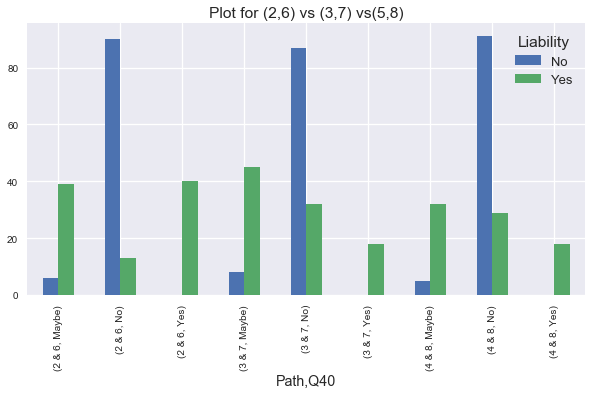

In [511]:
_ = pd.crosstab([p,a], b).plot(kind='bar', fontsize = 10,
                title='Plot for (2,6) vs (3,7) vs(5,8)', figsize=(10,5))

In [ ]:
newdf_2_8.Q40.dropna(inplace = True)
newdf_2_8.Q40.replace(['1.0', '2.0' , '3.0'],['Yes', 'May Be', 'No'], inplace = True)

In [513]:
pd.crosstab([newdf_2_8.Q40,data14.Liability],p, margins=True)

Path              2 & 6  3 & 7  4 & 8  All
Q40    Liability                          
May Be No             6      8      5   19
       Yes           39     45     32  116
No     No            90     87     91  268
       Yes           13     32     29   74
Yes    Yes           40     18     18   76
All                 188    190    175  553


## Observations (Verdict rate for each path)

### 1: From Table:
---------------

**For Path (2,6) : (No jury Instruction, Subsequent Remedial Mesure (Added code Insert))**

> When a juror strongly accepts the fact that later core insert implies that the original Carve 3000 was defective, i:e **Yes to Q40, the verdict rate is 100 %.**

>When a juror somewhat accepts the fact that later core insert implies that the original Carve 3000 was defective, i:e **May Be to Q40, the verdict rate is 86 %.**

>When a juror is denied the fact that later core insert implies that the original Carve 3000 was defective, i:e **No to Q40, the verdict rate is 12%.**

**For Path (3,7): (Simple Limiting Jury Instruction)**

> When a juror strongly accepts the fact that later core insert implies that the original Carve 3000 was defective, i:e **Yes** to Q40, the verdict rate is **100 %.**

>When a juror somewhat accepts the fact that later core insert implies that the original Carve 3000 was defective, i:e **May Be** to Q40, the verdict rate is **85%.**

>When a juror is denied the fact that later core insert implies that the original Carve 3000 was defective, i:e **No** to Q40, the verdict rate is **27%.**

**For Path (4,8): (Jury Instruction with Explanation)**

> When a juror strongly accepts the fact that later core insert implies that the original Carve 3000 was defective, i:e **Yes** to Q40, the verdict rate is **100%.**

>When a juror somewhat accepts the fact that later core insert implies that the original Carve 3000 was defective, i:e **May Be** to Q40, the verdict rate is **86%.**

>When a juror is denied the fact that later core insert implies that the original Carve 3000 was defective, i:e **No** to Q40, the verdict rate is **24%.**

#### Winrate Observation from Table:

Overal Winrate for  path (2,6) is 49% , for path (3,7) is 50% and path (3,7) is 45%.

<font color = red>1) From the table we can see that, the winrate slightly increasing(1%) when limiting jury instructions introduce in Path 3 and 7.</font>

2) Win rate decreases by around 5% when complex jury instruction added in path 4 and 8 as compare to path 3 and 7 keeping the response fixed.

### 2: From Plot:
------------------
1) When a juror has **strongly** suggested that the original Carve 3000 was defective, all of them responded to the liability question as **"Yes"** for all paths.

2) When a juror is **somewhat** suggested that the original Carve 3000 was defective, they are more likely to respond the liability question as **"Yes"**.

3) When a juror is saying **"No"** to Q40 and saying that it does not suggest that the original Carve 3000 was defective, they are more likely to respond the liability question as **"No"**.

**<font color = red> We can say that Q40 is an important factor while deciding Liability</font>**

<font color="blue" size=4><b> 2. Regression of Q40 vs Liability (Model 2)</b></font>

------------------------
**Effect of juror response for Q40 (Yes, No, Maybe) for different paths on Liability.**

Lets try to do the regression between <font color = red>Liability ~ Path+Q40</font>. But before that, we should check if there is any collinearity between those attributes exists or not.

In [514]:
import statsmodels.formula.api as sm
results = sm.ols(formula= 'Liability ~ C(Path) + C(Q40)',data =newdf_2_8).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Liability   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     119.8
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           2.13e-73
Time:                        03:25:10   Log-Likelihood:                -227.20
No. Observations:                 553   AIC:                             464.4
Df Residuals:                     548   BIC:                             486.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8094      0.039     20.952      0.000       0.733       0.885
C(Path)[T.3]      0.0796      0.038      2.089      0.037       0.005       0.154
C(Path)[T.4]      0.0680      0.039      1.749      0.081      -0.008       0.144
C(Q40)[T.No]     -0.6446      0.037    -17.257      0.000      -0.718      -0.571
C(Q40)[T.Yes]     0.1557      0.053      2.937      0.003       0.052       0.260
==============================================================================
Omnibus:                       52.348   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.185
Skew:                           0.739   Prob(JB):                     1.56e-15
Kurtosis:                       3.880   Cond. No.                         5.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Condition number can be computed using eigenvalues of the normalized predictor variable. If the value is small it indicates that there is no collinearity between the variable else there should be an error indicating that the condition number is high.**

Cond. No -> 5.54 which is less.
Removing "Yes" due to convergence error.

In [515]:
logit_model = smf.logit(formula= 'Liability ~ C(Q40) + C(Path) ', 
              data = newdf_2_8[newdf_2_8.Q40.isin(['No','May Be'])]).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.483903
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                  477
Model:                          Logit   Df Residuals:                      473
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.2803
Time:                        03:25:10   Log-Likelihood:                -230.82
converged:                       True   LL-Null:                       -320.70
                                        LLR p-value:                 9.962e-39
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4395      0.291      4.943      0.000       0.869       2.010
C(Q40)[T.No]    -3.1610      0.287    -11.017      0.000      -3.723      -2.599
C(Path)[T.3]     0.6312      0.296      2.133      0.033       0.051       1.211
C(Path)[T.4]     0.5524      0.303      1.826      0.068      -0.041       1.145
================================================================================
"""

In [516]:
print(np.exp(1.4395)/(1+np.exp(1.4395)))
print(np.exp(1.4395+0.6312)/(1+np.exp(1.4395+0.6312)))
print(np.exp(0.6312 - 0.5524)/(1+np.exp(0.6312 - 0.5524)))

0.8083772116328087
0.8880225872818766
0.5196898124951566


### Observation From Model 2


<font color = blue >The model can be written as : </font> 

$Liability = \beta_0 + \beta_1 Q40(No) + \beta_2 path(3)+ \beta_4 Path(4)$

> The intercept ($\beta_0$) is the **Base condition** when the path is 2 and Juror said "May be" to Q40 i:e a juror somewhat suggested that the original Carve 3000 was defective find X5 as Liable belong to path 2.

### Interpretation of Liability for Path 2,6 vs 3,7:

As we have replaced the path 6,7 with 2,3 let's see the Liability for path 2 vs 3.

<font color = blue >($\beta_0$)</font> : Log odd of finding Liability at Path 2 when juror what somewhat agree to Q40 and no limiting jury instruction introduced is **1.4395**.Interm of percentage around 81%.

<font color = blue >($\beta_1$)</font> : When we change the path from 2 to 3 (when simple limiting jury instruction was introduced) , it tells us the log odd ratio of awarding Liability i:e **0.6312**    

Keeping the juror response fixed for Q40, The odds of awarding Liability is about <font color = blue > 2 </font> times greater when **No** Limiting jury instruction introduced (path 2) than Limiting Jury instruction introduced (in path 3).

Comparing to the base scenario, keeping the response for Q40 fixed, when we change from scenario 2 to 3, the odds ratio of awarding liability is 0.6312, Interm of percentage 89%(8% increase) from the path (2-3).

### Interpretation of Liability from Path 2,6 vs 4,8:

Comparing to the base scenario and keeping the response for Q40 fixed, when we change from path 2 to 4 (complex limiting jury instruction introduced), the odds ratio of awarding liability is 0.5524, Interm of percentage its 88% (7% increase)compare to path 2.

### Interpretation of Liability from Path 3,7 vs 4,8:

When we change from path 3 (simple limiting jury instruction) to 4 (complex limiting jury instruction) , the odds ratio of awarding liability reduces by 1%.


# Question 2:
--------------------------------------------------------------------

**Question:** 

<font color = red> With respect to the 2nd questions, again answers from participants in versions 1,2 and 5 and 6  are meaningless. They did not receive the jury instruction telling them to ignore the evidence.  Again, we should do the same analysis as above. Do people that say they can ignore the evidence have lower liability verdicts than people that say they cannot ignore the evidence (for the remaining scenarios 3-4 and 7-8).</font>



#### Solution:
-----------------------------

The question 41 is:

**'Were you able to ignore the  fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?'**

The responses for this question can be :

- Yes, I was able to ignore that evidence  (1) 
- No, I was not able to ignore that evidence  (3) 

At first we removed the observations with value <font color = red>(1,3)</font>. And we have already replaced the path 7,8 with path 3 and 4.

In [517]:
newdf_3_4 = data14[data14['Path'].isin([3,4]) & data14.Q41.isin(['1','3'])]

Now let build a table with **Total liability count** for both **path** and for **both response to Question 41**.

In [518]:
a1 = newdf_3_4['Q41'].replace(['1','3'], ['Yes','No'])
a1 = a1[a1.apply(len) > 0]

b1 = data14['Liability']

c =  newdf_3_4.Path
c = c.astype(str)
c.replace(['3','4'],['3 & 7','4 & 8'],inplace = True)

p = pd.crosstab([a1,b1], c,  margins=True , margins_name='Total')
p

Path             3 & 7  4 & 8  Total
Q41   Liability                     
No    No             5      2      7
      Yes           32     24     56
Yes   No            79     82    161
      Yes           48     43     91
Total              164    151    315

### Observation (Verdict rate for each path)
--------------------------------------------

**For Path (3,7)**
> When the  says that **he can ignore the fact that X5 added core inserts to the later Carve 3000 model i:e **Yes** to Q41, the verdict rate is **38%.**

> When the juror says that **he can not ignore the fact that X5 added core inserts to the later Carve 3000 model i:e **No** to Q41, the verdict rate increases significantly  to **86%.**

**For Path (4,8)**

> When the juror says that **he can ignore the fact that X5 added core inserts to the later Carve 3000 model i:e **Yes** to Q41, the verdict rate is **34%.**

> When the juror says that **he can not ignore the fact that X5 added core inserts to the later Carve 3000 model i:e **No** to Q41, the verdict rate increases significantly  to **92%.**

Overal Winrate for  **path (3 & 7) is 48% and for path (4 & 8) is 44%.**

### Plot for Path (3,7) and (4,8) 


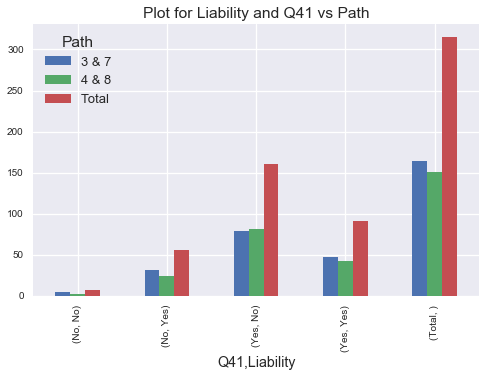

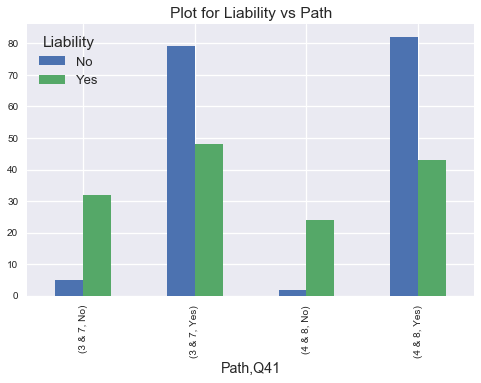

In [519]:
_ = p.plot(kind='bar', fontsize = 10, figsize=(8,5), 
           title='Plot for Liability and Q41 vs Path') 
_ = pd.crosstab([c, a1],b1).plot(kind='bar', fontsize = 10, figsize=(8,5), 
                                 title='Plot for Liability vs Path')  

In [ ]:
import statsmodels.formula.api as smf # stats model formula
import seaborn as sb # statistical visulaization
%matplotlib inline 
import matplotlib.pyplot as plt
sb.set(style="darkgrid", context="talk")
from scipy import stats
import statsmodels.formula.api as sm

newdf_3_4['Liability'] = newdf_3_4['Liability'].map({"Yes":1, "No":0})
newdf_3_4.Q41 =  newdf_3_4.Q41.astype('category')

In [521]:
results = smf.logit(formula= 'Liability ~ Q41', data = newdf_3_4).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.593010
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                  315
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.1417
Time:                        03:25:12   Log-Likelihood:                -186.80
converged:                       True   LL-Null:                       -217.64
                                        LLR p-value:                 4.030e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5705      0.131     -4.350      0.000      -0.828      -0.313
Q41[T.3]       2.6500      0.422      6.283      0.000       1.823       3.477
==============================================================================
"""

In [522]:
print(np.exp(-0.5705) /(1+np.exp(-0.5705)))
print(np.exp(2.6500-0.5705) /(1+np.exp(2.6500-0.5705)))

0.3611214604671143
0.8888946624188838


### Model Observations : 
-------------------------------------------
From the Model, we can see that the response to Q41 is a significant factor in deciding Liability. As the p-val is very less (<0.05). 

Now 

>  The odds of finding liability when juror says that he can ignore the fact that X5 added core inserts to the later Carve 3000 model i:e **Yes** to Q41 is : -0.5705 interm of percentage its **36.11%**

>  The odds ratio of finding liability when juror says that he can not ignore the fact that X5 added core inserts to the later Carve 3000 model i:e **No** to Q41 is :2.6500 and  interm of percentage its **89%**

**<font color = blue> We find that Q41 is a significant factor for awarding liability</font>**

<font color="blue" size=5><b> Logistic regression with categorical variables Path(1-4) and Income</b></font>
- ** Impact of Path and Income on Liability **

$Liability = \beta_0 + \beta_1 Path$

In [523]:
import statsmodels.formula.api as smf # stats model formula
import seaborn as sb # statistical visulaization
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
sb.set(style="darkgrid", context="talk")

In [524]:
import pandas as pd
model1_data = pd.read_csv('cleaning.csv', encoding= 'ISO-8859-1')
model1_data['Path'].replace([5,6,7,8], [1,2,3,4], inplace = True)
model1_data['Liability'] = model1_data['Liability'].map({"Yes":1, "No":0})
model1_data['Path']=model1_data['Path'].astype('category')
model1_data['Income']=pd.Categorical(model1_data['Income'])
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model = smf.logit(formula= 'Liability~ Path+Income', data = model1_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.685218
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                  729
Model:                          Logit   Df Residuals:                      720
Method:                           MLE   Df Model:                            8
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                0.007934
Time:                        03:25:12   Log-Likelihood:                -499.52
converged:                       True   LL-Null:                       -503.52
                                        LLR p-value:                    0.4344
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3729      0.405     -0.920      0.358      -1.167       0.422
Path[T.2]       0.3163      0.214      1.479      0.139      -0.103       0.736
Path[T.3]       0.3571      0.214      1.671      0.095      -0.062       0.776
Path[T.4]       0.1681      0.217      0.774      0.439      -0.257       0.594
Income[T.2]     0.2763      0.424      0.652      0.515      -0.555       1.107
Income[T.3]    -0.0323      0.417     -0.077      0.938      -0.850       0.786
Income[T.4]    -0.1348      0.410     -0.329      0.742      -0.938       0.669
Income[T.5]     0.1001      0.443      0.226      0.821      -0.768       0.968
Income[T.6]     0.4335      0.778      0.557      0.578      -1.092       1.959
===============================================================================
"""

- Cross tab for Liability vs Path and Liability vs Income

In [525]:
c =  model1_data.Liability
c = c.astype(str)
c.replace(['1','0'],['Yes','No'],inplace = True)
pd.crosstab(c,model1_data.Path,margins=True)

Path,1,2,3,4,All
Liability,,,,,
No,103,96,95,96,390
Yes,73,92,95,79,339
All,176,188,190,175,729


In [526]:
pd.crosstab(c,model1_data.Income,margins=True)

Income,1,2,3,4,5,6,All
Liability,,,,,,,
No,15,70,100,154,47,4,390
Yes,12,80,82,117,43,5,339
All,27,150,182,271,90,9,729


###  Graph of Liability vs Path

Text(0.5,1,'Liability Vs Path Graph')

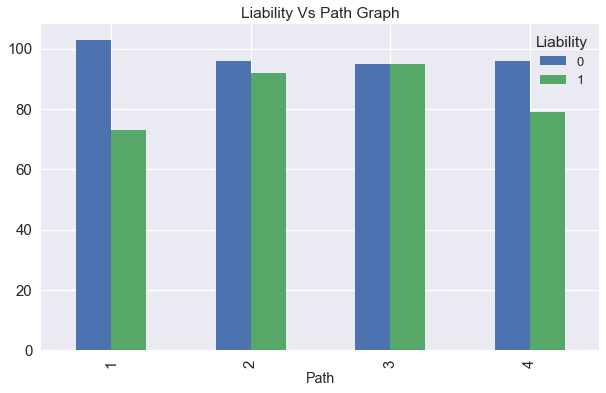

In [527]:
pd.crosstab(model1_data.Path,model1_data.Liability).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Path Graph')


### Graph of Liability vs Income

Text(0.5,1,'Liability Vs Income Graph')

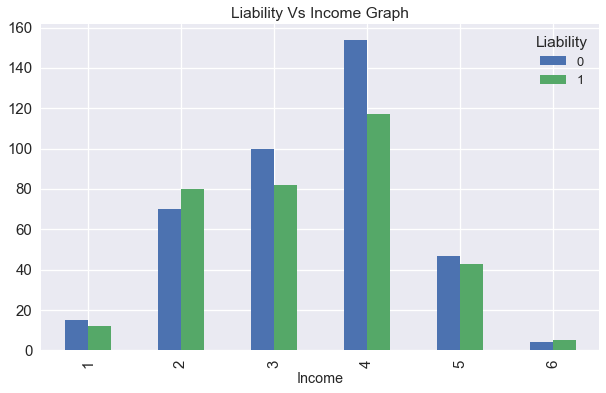

In [528]:
pd.crosstab(model1_data.Income,model1_data.Liability).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Income Graph')

## Interpretation:
--------------------

<font size=3 color='red'>From the model(p>0.05) and graphs we can see that Path and Income are not significant in predicting the Liability </font>
 

<font color="blue" size=5><b> Logistic regression for Liability vs Path(1-4) and Path(5-8)</b></font>
-  Impact of Low Anchor and No Anchor on Liability
-  $Liability = \beta_0 + \beta_1 Path$

For Performing this regression, we have grouped path1 to path4 into one group and path5 to path8 into other group. 

In [529]:
df_model=pd.DataFrame(data18[["Liability",'Path']])

df_model['Path']= df_model.Path.astype('int') 
df_model['Liability'] = df_model['Liability'].map({"Yes":1, "No":0})
df_model['Path'].replace([1,2,3,4], [14,14,14,14], inplace = True)
df_model['Path'].replace([5,6,7,8], [58,58,58,58], inplace = True)

- Running the logit model on Liability vs Path

In [530]:
import statsmodels.formula.api as smf # stats model formula
import seaborn as sb # statistical visulaization
%matplotlib inline 
import matplotlib.pyplot as plt
sb.set(style="darkgrid", context="talk")

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model = smf.logit(formula= 'Liability~C(Path)', data = df_model).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.690653
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                  729
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:               6.574e-05
Time:                        03:25:13   Log-Likelihood:                -503.49
converged:                       True   LL-Null:                       -503.52
                                        LLR p-value:                    0.7969
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1210      0.105     -1.152      0.249      -0.327       0.085
C(Path)[T.58]    -0.0382      0.149     -0.257      0.797      -0.329       0.253
=================================================================================
"""

### crosstab of Liability and Path(path1-4 as one group and path 5-8 into other group)

In [531]:
c =  df_model.Liability
c = c.astype(str)
c.replace(['1','0'],['Yes','No'],inplace = True)
pd.crosstab(c,df_model.Path,margins=True)

Path,14,58,All
Liability,,,
No,193,197,390
Yes,171,168,339
All,364,365,729


### Graph of Liability vs Path

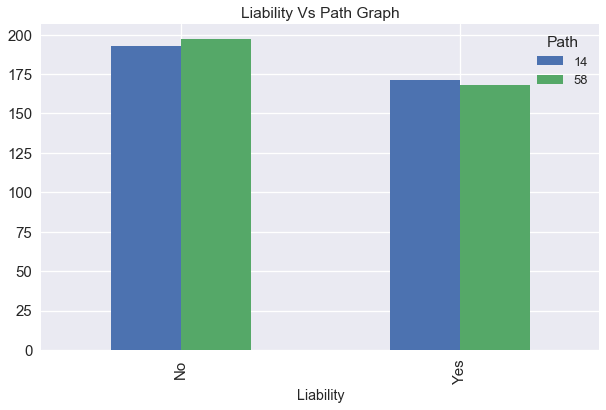

In [532]:

pd.crosstab(c,df_model.Path).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Path Graph')

plt.savefig('Juror Response vs Path')

In [533]:
print(1-np.exp(-0.0382))

0.0374795824440034


## Interpretation:
- p-value is greater than 0.05.Hence model is not significant.
- we can interpret model coefficient as
Compared to path 1-4, there is 3.74% reduction odd in saying yes for path 5-8.

<font color="blue" size=5><b> Logistic Regression from Path (1-4) vs Liability for Snowboard and  Staircase Dataset.</b></font>

To perform the regression , we have merged both the dataset.

> For staircase dataset we are taking path (2,3,4 and 5).

> **Path(2,3,4,5) from Staircase + (1,2,3,4) no low anchor data from Snowboard  + (5,6,7,8) low anchor data from Snowboard   **

In [534]:
import pandas as pd

staircase_data = pd.read_csv('old_data.csv', encoding= 'ISO-8859-1')

In [535]:
staircase_data.rename(columns={"Scenario": "Path"},inplace=True)
staircase_data = staircase_data.query("Path>1")
staircase_data.Path.replace([2,3,4,5],[1,2,3,4],inplace=True)

staircase_dat = staircase_data[["Path","Liability"]]
snowboard_dat = data14[["Path","Liability"]]

Lets see the count of each data set.

In [536]:
print(staircase_dat.count())
print(snowboard_dat.count())

Path         778
Liability    778
dtype: int64
Path         729
Liability    729
dtype: int64


Lets merge the data.

In [537]:
merged_data =[staircase_dat,snowboard_dat]
result = pd.concat(merged_data)

Lets check if any value is Null or not.

In [538]:
result.isnull().sum()

Path         0
Liability    0
dtype: int64

In [539]:
result.Liability = result.Liability.astype(str)
result.Liability = result.Liability.replace(['Yes','No'], ['1','0'])
result.Liability = result.Liability.astype(int)

pd.crosstab(result.Path,result.Liability, margins = True)

Liability,0,1,All
Path,,,
1,204,169,373
2,154,220,374
3,176,218,394
4,177,189,366
All,711,796,1507


In [540]:
from scipy import stats
final_model= smf.logit(formula= 'Liability ~ C(Path)', data = result).fit()
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.686552
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                 1507
Model:                          Logit   Df Residuals:                     1503
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                0.007235
Time:                        03:25:14   Log-Likelihood:                -1034.6
converged:                       True   LL-Null:                       -1042.2
                                        LLR p-value:                  0.001750
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1882      0.104     -1.810      0.070      -0.392       0.016
C(Path)[T.2]     0.5449      0.148      3.686      0.000       0.255       0.835
C(Path)[T.3]     0.4022      0.145      2.770      0.006       0.118       0.687
C(Path)[T.4]     0.2538      0.148      1.721      0.085      -0.035       0.543
================================================================================
"""

### Interpretations:
------------------

> The P-value of Path 2 and 3 are really **very low <0.05**. so we can say that this factor is a significant factor for awarding liability. 

> The Percentage of awarding Liability at 

-  Path 1 ---- 45%, 
-  Path 2 ---- 59%,
-  Path 3 ---- 55%,
-  Path 4 ---- 51%

> So we can say that there is an **increase in awarding Liability when the remedial measures introduced in Path 2**. But when the **limiting jury instruction introduces the Liability decreases to 55%** and again **it decreases, even more, when explaining to the limiting jury instruction introduced in Path 4.**

<font color="blue" size=5><b> Linear model to see the Discounted_Damages vs Path </b></font>
- Impact of Path on Discounted damages

In [541]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Discounted_Damages ~ Path', data=data14).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Discounted_Damages   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6876
Date:                Fri, 08 Jun 2018   Prob (F-statistic):              0.407
Time:                        03:25:14   Log-Likelihood:                -9793.2
No. Observations:                 729   AIC:                         1.959e+04
Df Residuals:                     727   BIC:                         1.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.686e+04   1.52e+04      5.717      0.000     5.7e+04    1.17e+05
Path        4612.8463   5562.922      0.829      0.407   -6308.462    1.55e+04
==============================================================================
Omnibus:                      177.256   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.667
Skew:                           1.547   Prob(JB):                     1.05e-69
Kurtosis:                       3.942   Cond. No.                         7.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table and Graph of Discounted Damages  vs Path

In [542]:
data14.groupby("Path").Discounted_Damages.mean()

Path
1     91850.795455
2     98567.021277
3     94718.421053
4    108744.285714
Name: Discounted_Damages, dtype: float64

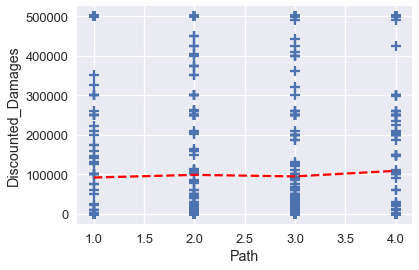

In [543]:
plt.scatter(data14.Path, data14.Discounted_Damages, marker = "+")
plt.plot([1,2,3,4], [np.mean(data14.query('Path == 1').Discounted_Damages), np.mean(data14.query('Path == 2').Discounted_Damages),
                     np.mean(data14.query('Path == 3').Discounted_Damages),np.mean(data14.query('Path == 4').Discounted_Damages)], 'r--')
plt.ylabel("Discounted_Damages")
plt.xlabel("Path")
plt.show()

<font color='red' size=5>Interpretation: </font>
- <b>From the model and the graph we can see that Path is not the predictor for damages. </b>

<font color="blue" size=5><b> Final Regression model(Liability vs Education) </b></font>
- Impact of Education with levels 1-9(1-Low and 9-High) on Liability


In [544]:
import pandas as pd
final_data = pd.read_csv('cleaning.csv', encoding= 'ISO-8859-1')
final_data['Liability'] = final_data['Liability'].map({"Yes":1, "No":0})
final_data['Path'].replace([5,6,7,8], [1,2,3,4], inplace = True)
final_data.Path = pd.Categorical(final_data.Path)
#final_data.Education = pd.Categorical(final_data.Education)
final_data.Income = pd.Categorical(final_data.Income)

In [545]:
pd.crosstab(final_data.Liability,final_data.Education,margins=True)

Education,1,2,3,4,5,6,7,8,9,All
Liability,,,,,,,,,,
0,1,2,42,93,42,157,48,5,0,390
1,0,2,45,85,42,123,28,9,5,339
All,1,4,87,178,84,280,76,14,5,729


** From the above table, we can see that Education=(1,9) are pure classes(probability=1).If we model this we get convergence error.So Removing Education=(1,9) and performing the model **

In [546]:
final_data=final_data[((final_data.Education != 1) & (final_data.Education != 9))]
final_data.Education.unique()

array([5, 4, 6, 3, 7, 8, 2], dtype=int64)

In [547]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
final_model= smf.logit(formula= 'Liability ~ C(Education)', data = final_data).fit()
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.685480
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Liability   No. Observations:                  723
Model:                          Logit   Df Residuals:                      716
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                0.006912
Time:                        03:25:15   Log-Likelihood:                -495.60
converged:                       True   LL-Null:                       -499.05
                                        LLR p-value:                    0.3303
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.434e-14      1.000  -3.43e-14      1.000      -1.960       1.960
C(Education)[T.3]     0.0690      1.023      0.067      0.946      -1.936       2.074
C(Education)[T.4]    -0.0899      1.011     -0.089      0.929      -2.072       1.892
C(Education)[T.5]  3.438e-14      1.024   3.36e-14      1.000      -2.006       2.006
C(Education)[T.6]    -0.2441      1.007     -0.242      0.809      -2.218       1.730
C(Education)[T.7]    -0.5390      1.028     -0.524      0.600      -2.554       1.476
C(Education)[T.8]     0.5878      1.145      0.513      0.608      -1.656       2.832
=====================================================================================
"""

<font size=4 color='red'> From the model,we can find that Education with levels=(2,3,4,5,6,7,8) has no significant impact on the decision of Juror.But all the participants with Education level=1 agreed that Defendent was negligent and participants with Education level=9 agreed that Defendent was not negligent.</font>

<font color = 'blue' size=6> Merged Dataset Calculations:</font>

### We are merging the old dataset(Staircase) and new dataset(Snowboard) and calculating the Case expected and plaintiff win rate.
** Replacing the Path of oldset Path=2,3,4,5 to Path = 1,2,3,4 and removing path1**

In [548]:
import pandas as pd
new_data = pd.read_csv('cleaning.csv', encoding= 'ISO-8859-1')
old_data = pd.read_csv('old_data.csv', encoding= 'ISO-8859-1')
old_data = old_data.query("Scenario>1")
old_data.Scenario.replace([2,3,4,5],[1,2,3,4],inplace=True)

** Replacing Path of new dataset with Path=5,6,7,8 with Path=1,2,3,4. **

In [549]:
newdf1=pd.DataFrame(new_data[["StartDate","EndDate","Duration","Liability",'Total_Damages','Path','Was_McNeil_negligent','Discounted_Damages']])
newdf1['Path'].replace([5,6,7,8], [1,2,3,4], inplace = True)

** Renaming the column names for old and new datasets **

In [550]:
newdf1.rename(columns={"StartDate": "Start Date", 
                         "EndDate":"End Date",
                         "Total_Damages":"damages",
                       "Was_McNeil_negligent":"Plaintiff_negligent",
                       "Discounted_Damages":"Discounted_damages"
                         },inplace=True)

newdf1['Plaintiff_negligent'] = newdf1['Plaintiff_negligent'].map({1:"Yes", 2:"No"})
newdf1['Liability'] = newdf1['Liability'].map({"Yes":1, "No":0})

old_data1=pd.DataFrame(old_data[["Start Date","End Date","Liability",'damages','Scenario','Dunn_negligent','Discounted_damages']])
old_data1.rename(columns={
                       "Scenario":"Path","Dunn_negligent":"Plaintiff_negligent"
                         },inplace=True)

** Merging Old dataset and new dataset.We can retrieve the dataset(old/new) based on the keys(x,y)**

In [551]:
frames=[newdf1,old_data1]
merge_data = pd.concat(frames, keys=['x', 'y'])
merge_data.head()

Discounted_damages  Duration             End Date  Liability  Path  \
x 0                 0.0    1039.0  2018-04-06 13:32:00          0     1   
  1                 0.0     915.0  2018-04-06 13:33:00          1     1   
  2            500000.0    1051.0  2018-04-06 13:33:00          1     1   
  3                 0.0    1092.0  2018-04-06 13:33:00          0     1   
  4            262500.0    1135.0  2018-04-06 13:33:00          1     2   

    Plaintiff_negligent           Start Date   damages  
x 0                 NaN  2018-04-06 13:15:00       0.0  
  1                 NaN  2018-04-06 13:17:00       0.0  
  2                  No  2018-04-06 13:15:00  500000.0  
  3                 NaN  2018-04-06 13:15:00       0.0  
  4                 Yes  2018-04-06 13:14:00  350000.0

In [552]:
#To retrieve data based on the keys:
merge_data.loc['x'].head()

,Discounted_damages,Duration,End Date,Liability,Path,Plaintiff_negligent,Start Date,damages
0,0.0,1039.0,2018-04-06 13:32:00,0,1,NaN,2018-04-06 13:15:00,0.0
1,0.0,915.0,2018-04-06 13:33:00,1,1,NaN,2018-04-06 13:17:00,0.0
2,500000.0,1051.0,2018-04-06 13:33:00,1,1,No,2018-04-06 13:15:00,500000.0
3,0.0,1092.0,2018-04-06 13:33:00,0,1,NaN,2018-04-06 13:15:00,0.0
4,262500.0,1135.0,2018-04-06 13:33:00,1,2,Yes,2018-04-06 13:14:00,350000.0


** Case Expected Value Damages for the merge data
Showing the total expected discounted damages mean,median and sd with winrate percentage (entire version) **


In [553]:
merge_data
merge_data['winrate_percentage']=merge_data.Liability
merge_data['Discounted_damages_mean']=merge_data.Discounted_damages
merge_data['Discounted_damages_median']=merge_data.Discounted_damages
merge_data['No.of.Participants']=merge_data.Path

winrate_damages_expected_merge_data=merge_data.groupby('Path').aggregate(
    {"No.of.Participants":'count',
    'winrate_percentage': np.mean, 'Discounted_damages_mean': np.mean,'Discounted_damages_median':np.median})

winrate_damages_expected_merge_data.winrate_percentage*=100
winrate_damages_expected_merge_data


,No.of.Participants,winrate_percentage,Discounted_damages_mean,Discounted_damages_median
Path,,,,
1,373,45.308311,286570.348525,0.0
2,374,58.823529,247615.240642,50000.0
3,394,55.329949,101647.842640,17500.0
4,366,51.639344,100403.688525,0.0


## Finding the Discounted Damages, mean , median and SD when plaintiff wins for the merge data

In [554]:
merge_data['Discounted_damages_mean1']=merge_data.Discounted_damages
merge_data['Discounted_damages_median1']=merge_data.Discounted_damages
merge_data['Discounted_damages_sd1']=merge_data.Discounted_damages
winrate_damages_plaintiffwin_merge_data=merge_data.loc[(merge_data['Plaintiff_negligent']=='No') & (merge_data['Liability']==1)].groupby('Path').aggregate({"No.of.Participants":'count','Discounted_damages_mean1': np.mean,'Discounted_damages_median1':np.median,'Discounted_damages_sd1':np.std})
winrate_damages_plaintiffwin_merge_data

,No.of.Participants,Discounted_damages_mean1,Discounted_damages_median1,Discounted_damages_sd1
Path,,,,
1,110,222809.090909,180000.0,139046.655457
2,146,215551.369863,180000.0,119025.464234
3,144,226458.333333,200000.0,124895.081843
4,131,226561.068702,200000.0,139378.593750
